## PCA example

Shows the four most common features of faces and prints the minimal allowed distance
for new faces.

took 12.920428037643433 seconds to read data
base took 0.17925500869750977 seconds to build


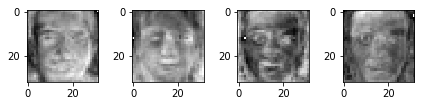

Maximal allowed distance for new faces: 496.49288293208383


In [11]:
from eigenfaces import *
from time import time

time_stamp_pre = time()

(base_data, training_data, test_data) =\
    get_training_test_and_real_test_data()

print("took {} seconds to read data"
       .format(time() - time_stamp_pre))

classifier = Eigenclassifier(base_dim=4, orthogonalize=True)
classifier.build_base(base_data)
md = classifier.get_min_distance_to_faces(base_data, training_data)
classifier.show_principal_component()

print("Maximal allowed distance for new faces: {}".format(md))

## Examples of Classification.

The test_data does not contain annotations, it does however appear to be the case that all tests are faces.
It is assumed that all tests are faces and anything not classified as a face is a missclassification.

I encourage to try to switch around different variables and see what happends, play around with orthogonalization
and different space dimensionalities and use different data sets for building the minimal_distance. 

took 12.854193925857544 seconds to read data
base took 0.18300604820251465 seconds to build
751.368388543
Ratio of images classified as faces  0.978
The image was 1438.3443651884902 units away from it's closes face
Maximum allowed is 1417.0623677045758


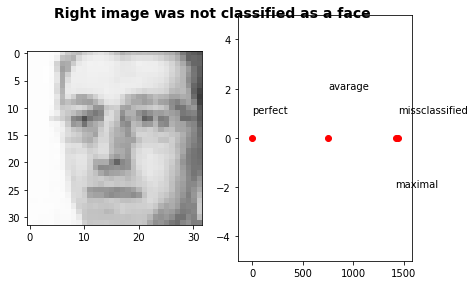

In [10]:
from eigenfaces import *
from time import time
from matplotlib import pyplot as plt


time_stamp_pre = time()

(base_data, training_data, test_data) =\
    get_training_test_and_real_test_data()

print("took {} seconds to read data"
       .format(time() - time_stamp_pre))

classifier = Eigenclassifier(base_dim=20)

# Try Changing some of these values and see what changes! :) 
# classifier = Eigenclassifier(base_dim=20, orthogonalize=True)

classifier.build_base(base_data)
classifier.get_min_distance_to_faces(base_data, training_data)

fig, (ax1, ax2) = plt.subplots(1, 2)


# If you want to induce some failure change the allowed maximum
classifier.maximal_allowed_distance = classifier.maximal_allowed_distance * 0.9

im = None
total_proximity = 0
proximity = 0
failures = 0
first_error_found = False
for image in test_data:
    (is_part_of_class, distance_from_face) = classifier.predict(image)
    total_proximity += distance_from_face
    if not is_part_of_class and not first_error_found:
        im = image
        proximity = distance_from_face
        first_error_found = True
    
    if not is_part_of_class:
        failures += 1


avarage_proximity = total_proximity / len(test_data)   
print(avarage_proximity)

max_limit = max(avarage_proximity, proximity)        
        
print("Ratio of images classified as faces ", 1 - failures / len(test_data))

if not im is None:
    ax1.imshow(vector_to_image(im, (32, 32)))
    ax2.set_xlim((-(0.1*max_limit), max_limit + 0.1 * max_limit))
    ax2.set_ylim((-5, 5))
    ax2.annotate("perfect", (0, 1))
    ax2.annotate("avarage", (avarage_proximity, 2))
    ax2.annotate("maximal", (classifier.maximal_allowed_distance, -2))
    ax2.annotate("missclassified", (proximity, 1))
    ax2.plot([0, avarage_proximity, classifier.maximal_allowed_distance, proximity],
             [0, 0, 0, 0], "ro")
    
    print("The image was {} units away from it's closes face".format(proximity))
    print("Maximum allowed is {}".format(classifier.maximal_allowed_distance))
    fig.suptitle('Right image was not classified as a face', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("No face failed, all were classified as positives :(")
    
        
    
    